# 임베딩(Embedding)

![wordrepresentation[1].PNG](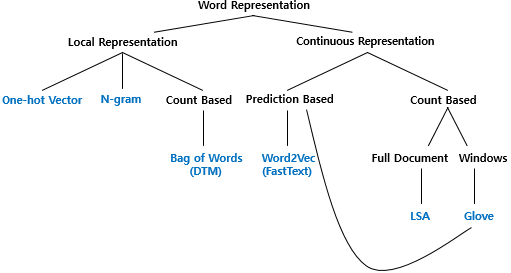)

- 워드 임베딩 챕터에서는 연속 표현(Continuous Representation)에 속함

* 워드 임베딩은 단어를 컴퓨터가 이해하고, 효율적으로 처리할 수 있도록 단어를 벡터화하는 기술
* 워드 임베딩은 단어의 의미를 잘 표현해야만 하며, 현재까지도 많은 표현 방법이 연구
* 워드 임베딩을 거쳐 잘 표현된 단어 벡터들은 계산이 가능하며, 모델 투입도 가능

<br>

<br>

## 인코딩(Encoding)

* 기계는 자연어(영어, 한국어 등)을 이해할 수 없음
* 데이터를 기계가 이해할 수 있도록 숫자 등으로 변환해주는 작업이 필요
* 이러한 작업을 인코딩이라고 함

* 텍스트 처리에서는 주로 정수 인코딩, 원 핫 인코딩을 사용

<br> 

### 정수 인코딩

<br> 

#### dictionary를 이용한 정수 인코딩

* 각 단어와 정수 인덱스를 연결하고, 토큰을 변환해주는 정수 인코딩

In [ ]:
text = '평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라.'

tokens = [x for x in text.split(' ')]
unique = set(tokens)
unique = list(unique) 

token2idx = {}

for i in range(len(unique)):
  token2idx[unique[i]] = i

encode = [token2idx[x] for x in tokens]
encode

[3, 4, 2, 7, 5, 9, 0, 1, 2, 6, 8]

<br> 
#### keras를 이용한 정수 인코딩

* 정수 인코딩은 단어에 정수로 레이블을 부여
* `dictionary`, `nltk` 패키지를 이용한 방법들도 있지만, `keras`에서는 텍스트 처리에 필요한 도구들을 지원
* 해당 도구는 자동으로 단어 빈도가 높은 단어의 인덱스는 낮게끔 설정

<br>

#### `tensorflow.keras.preprocessing.text.Tokenizer()` : 토크나이저 객체

#### `tensorflow.keras.preprocessing.text.Tokenizer().texts_to_sequences([문자열])` : 정수 인코딩

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer 

text = '평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라.'

t = Tokenizer()
t.fit_on_texts([text])
print(t.word_index)

encoded = t.texts_to_sequences([text])[0]
print(encoded)

{'것처럼': 1, '평생': 2, '살': 3, '꿈을': 4, '꾸어라': 5, '그리고': 6, '내일': 7, '죽을': 8, '오늘을': 9, '살아라': 10}
[2, 3, 1, 4, 5, 6, 7, 8, 1, 9, 10]


<br> 

### 원 핫 인코딩(One-Hot Encoding)

<br>

#### 조건문과 반복문을 이용한 원 핫 인코딩

* 원 핫 인코딩은 정수 인코딩한 결과를 벡터로 변환한 인코딩
* **원 핫 인코딩은 전체 단어 개수 만큼의 길이를 가진 배열에 해당 정수를 가진 위치는 1, 나머지는 0을 가진 벡터로 변환**   

In [ ]:
import numpy as np 

one_hot = []

for i in range(len(encoded)):
  temp = []

  for j in range(max(encoded)):
    if j == (encoded[i] - 1):
      temp.append(1)
    else:
      temp.append(0) 

  one_hot.append(temp)

np.array(one_hot)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

<br> 

#### keras를 이용한 원 핫 인코딩

* `keras`에서는 정수 인코딩을 원 핫 인코딩을 간단하게 변환해주는 `to_categorical()` 함수를 제공 

<br>

#### `tensorflow.keras.utils.to_categorical(정수인코딩)`

In [ ]:
from tensorflow.keras.utils import to_categorical  

one_hot = to_categorical(encoded)
one_hot

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

<br>

<br>

## IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

<br> 

### module import

In [ ]:
from tensorflow.keras.datasets import imdb 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, Dense, Flatten 

<br>

### 데이터 로드

In [ ]:
num_words = 1000 
max_len = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


<br>

### 데이터 확인
- 긍정: 1
- 부정: 0

In [ ]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [ ]:
for i in range(10):
  if y_train[i] == 0:
    label = "부정"
  else:
    label = "긍정"

  print("{}\n{}".format(x_train[i], label))

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
긍정
[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 2, 2

<br> 

### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기 (패딩)

  - `pad_sequence()`
    - 데이터가 maxlen보다 길면 데이터를 자름

    - 데이터가 길면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞추어야 `Embedding` 레이어를 사용할 수 있음

<br>

#### `tensorflow.keras.preprocessing.sequence.pad_sequences(sequence, maxlen, padding)` : 패딩
- `sequence` : 정수인코딩 리스트
- `maxlen` : 패딩 길이
- `padding` : (`pre`: 앞의 빈 부분을 0으로 채움 / `post` : 뒤의 빈 부분을 0으로 채움)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [ ]:
max_len = 100 

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

In [ ]:
print(len(x_train[5]))
print(len(pad_x_train[5]))

43
100


In [ ]:
print(x_train[5])
print(pad_x_train[5])

[1, 778, 128, 74, 12, 630, 163, 15, 4, 2, 2, 2, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 2, 173, 4, 749, 2, 16, 2, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1 778 128  74  12 630 163  15   4   2   2   2   2  32  85
 156  45  40 148 139 121 664 665  10  10   2 173   4 749   2  16   2   8
   4 226  65  12  43 127  24   2  10  10]


<br> 

### 모델 구성

In [ ]:
print(num_words)
print(max_len)

1000
100


In [ ]:
model = Sequential() 

model.add(Embedding(input_dim=num_words, output_dim=32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 35,201
Trainable params: 35,201
Non-trainable params: 0
_________________________________________________________________


<br> 

### 모델 컴파일 및 학습

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(pad_x_train, y_train,
                    epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 18s 22ms/step - loss: 0.5732 - acc: 0.7001 - val_loss: 0.4270 - val_acc: 0.8062
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3773 - acc: 0.8340 - val_loss: 0.3841 - val_acc: 0.8246
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3373 - acc: 0.8536 - val_loss: 0.3824 - val_acc: 0.8264
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3098 - acc: 0.8688 - val_loss: 0.3877 - val_acc: 0.8276
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2801 - acc: 0.8859 - val_loss: 0.3961 - val_acc: 0.8232
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2482 - acc: 0.9023 - val_loss: 0.4218 - val_acc: 0.8120
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2150 - acc: 0.9219 - val_loss: 0.4270 - val_acc: 0.8128
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - loss: 

<br>

### 시각화

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn-white')

<ipython-input-45-b36524865de2>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

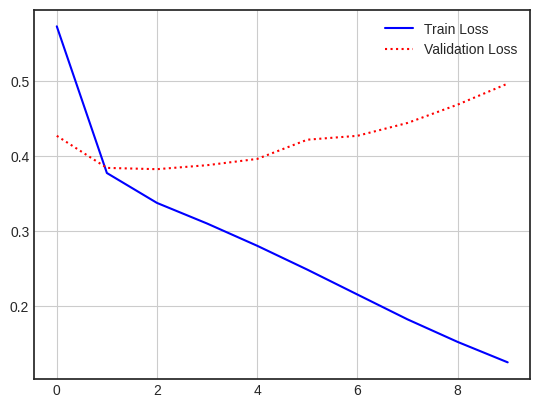

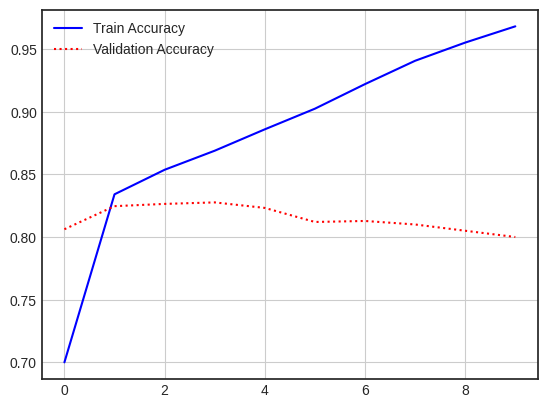

In [ ]:
plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['acc'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

<br> 

### 모델 평가

In [ ]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4855 - acc: 0.8047


[0.48548418283462524, 0.8047199845314026]

<br> 

### 단어의 수를 늘린 후 재학습

In [ ]:
num_words = 2000 
max_len = 400

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
pad_x_train_2 = pad_sequences(x_train, max_len, padding='pre')
pad_x_test_2 = pad_sequences(x_test, max_len, padding='pre')

In [ ]:
print(pad_x_train_2.shape)
print(pad_x_test_2.shape)

(25000, 400)
(25000, 400)


<br>

데이터 확인

In [ ]:
model = Sequential() 

model.add(Embedding(input_dim=num_words, output_dim=32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           64000     
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12801     
                                                                 
Total params: 76,801
Trainable params: 76,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history2 = model.fit(pad_x_train_2, y_train,
                    epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 37s 58ms/step - loss: 0.5215 - acc: 0.7351 - val_loss: 0.3558 - val_acc: 0.8456
Epoch 2/10
625/625 [==============================] - 10s 17ms/step - loss: 0.2884 - acc: 0.8804 - val_loss: 0.3091 - val_acc: 0.8692
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.2333 - acc: 0.9079 - val_loss: 0.3104 - val_acc: 0.8718
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1899 - acc: 0.9285 - val_loss: 0.3192 - val_acc: 0.8730
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.1487 - acc: 0.9480 - val_loss: 0.3274 - val_acc: 0.8730
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1129 - acc: 0.9644 - val_loss: 0.3598 - val_acc: 0.8646
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.0824 - acc: 0.9778 - val_loss: 0.3765 - val_acc: 0.8632
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - los

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


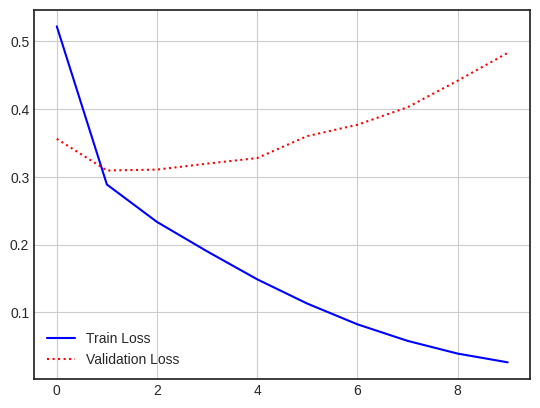

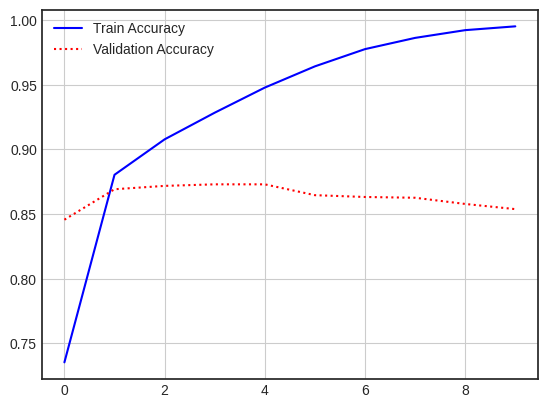

In [ ]:
hist_dict2 = history2.history
print(hist_dict2.keys())

plt.plot(hist_dict2['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict2['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict2['acc'], 'b-', label='Train Accuracy')
plt.plot(hist_dict2['val_acc'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()

In [ ]:
model.evaluate(pad_x_test_2, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.4639 - acc: 0.8514


[0.46392449736595154, 0.8514000177383423]

<br> 


#### 위의 결과도 나쁘지 않으나 과적합이 되는 이유
- **단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음**

- **시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음**
